# Computer vision object recognition

## Problem statement
Computer vision is pushing the technological frontier towards newer and brighter horizons once foreseen solely through the lens of science fiction. Autonomous driving, visual surveillance, and medical detection are all benefiting from the emerging technology - amongst many other applications.

The subject of computer vision is vast and quite extensive. Therefore, this notebook will focus solely on developing a model for image recognition. Specifically, we'll be focusing on identifying the difference between cats vs. dogs. Not only will this notebook serve as a means to work through the development of such a model, but also the science behind it - what is a CNN? How do you implement one? 

## Methodology
So having a background in software engineering and web development, my goal for this project will be to do the following:
  - Develop a CNN in TensorFlow or Keras (TK) 
   - Figure out how to use the above
  - Dive deeper into Deep Learning principles.
   - Really understand a CNN, and be able to explain what is happening. 
  - Deploy a model onto the web.
  - Make the final project interactive, and fun.
 
Am I biting off more than I can chew? We'll see. However, this project can be completed in steps which I will differentiate between MVP (Minimum Viable Product) and Fast Follows. The MVP will be completed first as a presentable project, with the Fast Follows being items I'd like to complete, time permitting.

### MVP
The main deliverable of the MVP of this project will be to **train a model that can recognize cats and dogs .** 
   - The main requirement should be that I can run test datasets against the model and score the model's ability to recognize an object correctly. 
    - Technology to be used - I'd like to try Keras?

### Fast Follows
The fun of this project lies in my ability to really dive deep into topics such as CNN's, Deep Learning, and whatever other items I may traverse while solving this problem. On top of that:
  - I really want to understand what it means to deploy something to a web application. Flask?
  - Host it on the cloud. GCP, AWS?
  - Develop a front end where user's can upload their own images - but that may require changes to the model. What if a user uploads a picture of a cow? Will the model know that something is not a cat and not a dog? 

Again, this may be a lofty goal, but CV is something I'm super interested in, and have already started diving into topics on my own free time. 

## The Dataset
The data comes from [this dataset of cats and dogs](https://www.microsoft.com/en-us/download/details.aspx?id=54765)

### Preview

In [174]:
import tensorflow_datasets as tfds
import matplotlib.pylab as plt
import pandas as pd
import keras
import glob
import numpy as np

In [191]:
# Let's create a dataframe.

labels = []

cat_files = glob.glob("data/train/PetImages/Cat/*.jpg")
dog_files = glob.glob("data/train/PetImages/Dog/*.jpg")
filenames = cat_files + dog_files

# Cat files will be labeled with 1
for cat_file in cat_files:
    labels.append("1")

# Dog files will be labeled with 0
for dog_file in dog_files:
    labels.append("0")

df = pd.DataFrame({
    'filename': filenames,
    'label': labels
})

df.sample(5)

,filename,label
15575,data/train/PetImages/Dog/172.jpg,0
15650,data/train/PetImages/Dog/5131.jpg,0
24160,data/train/PetImages/Dog/12262.jpg,0
2397,data/train/PetImages/Cat/9736.jpg,1
16699,data/train/PetImages/Dog/3685.jpg,0


## A high level look
    - It looks like we have 25000 samples total - 12,500 for each category. 
    - Each image is of different size it seems, and in color. Those will need to be probably resized homogeneously, and in grayscale. 

In [227]:
# 25000 total 

df['label'].value_counts()

1    12500
0    12500
Name: label, dtype: int64

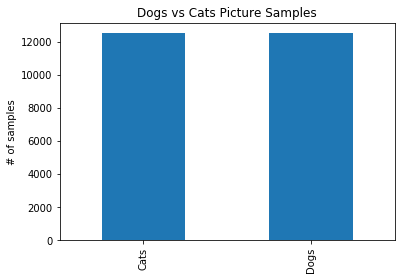

In [193]:
ax = df['label'].value_counts().plot.bar()
plt.title('Dogs vs Cats Picture Samples')
plt.xticks(np.arange(2), ("Cats", "Dogs"));
plt.ylabel("# of samples");

In [224]:
def show_sample_photos(files):
    plt.subplots(figsize=(10, 10))
    
    for i in range(6):
        plt.subplot(230 + 1 + i)
        sample = keras.preprocessing.image.load_img(files[i])
        plt.imshow(sample)
    plt.show()

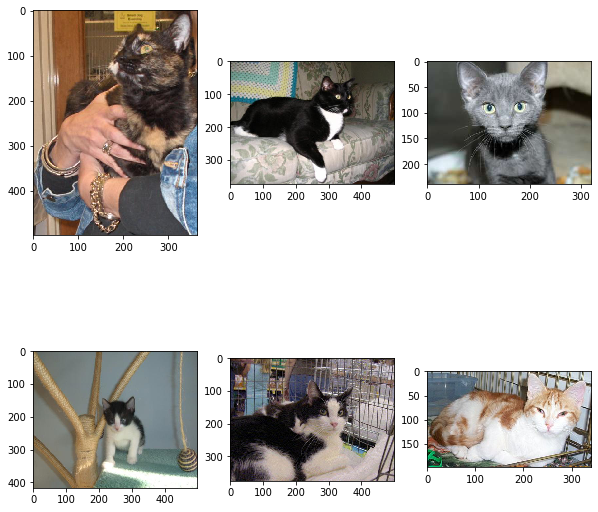

In [225]:
# Target variable is the label (1 for dog, 0 for cat)
show_sample_photos(cat_files)

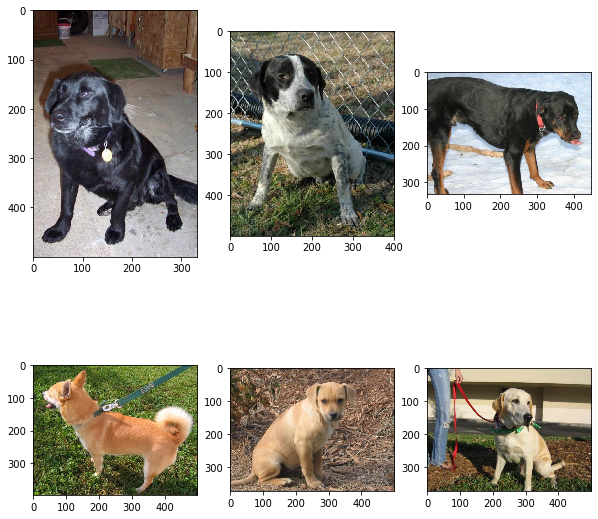

In [226]:
show_sample_photos(dog_files)